## Vamos a calcular las curvas de veloc circular para las galaxias en el tiempo de formación de la barra

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## MW gagdet

13.866633233140519 1.0


/home/omarioni/miniconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


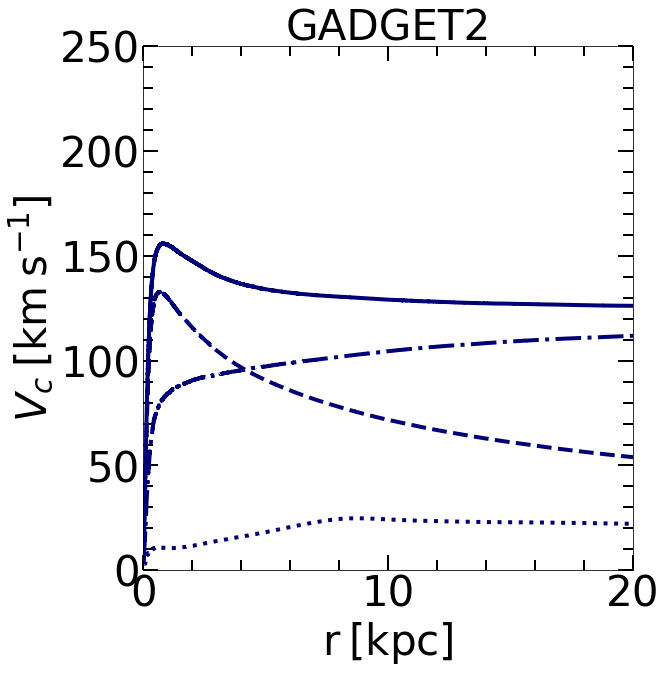

In [5]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np
import time_conversion as tiempo

vector = ('00','01','03')
vector2 = ('M31', 'MW', 'M33')
h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

# path = '/home/ornela/SimCLUES/'
path = '/home/omarioni/'
atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]

path = '/mnt/is2/alejandro/ornella/'
#snapshot=range(381,380,-1)
# snapshot=range(430,429,-1)
snapshot = ('381','422','463','496')

# for isnap in snapshot:
isnap=496
snap = h5py.File(path + 'outputs_1/snap_496.h5py', 'r')

for i in range(1,2):
    cm   = snap['subhalo_0'+ str('%s'%vector[i])+ '/Center'].value
    r200 = snap['subhalo_0'+ str('%s'%vector[i])+ '/R200'].value

    pstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Coordinates'].value
    mstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Masses'].value
    vel  = snap['subhalo_0'+ str('%s'%vector[i])+ '/Str/Velocities'].value

    pgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Coordinates'].value
    mgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Masses'].value

    pdrk = snap['subhalo_0'+ str('%s'%vector[i]) + '/Drk/Coordinates'].value
    mdrk = snap['subhalo_0'+ str('%s'%vector[i])+ '/Drk/Masses'].value

    z = a0/aexp[isnap] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    time = tiempo.conv(z, h, omega_lambda, omega_matter)

    print time, aexp[isnap]

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
    ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
    zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = (pgas[:,0]-cm[0])*aexp[isnap]/h
    ygas = (pgas[:,1]-cm[1])*aexp[isnap]/h
    zgas = (pgas[:,2]-cm[2])*aexp[isnap]/h
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = (pdrk[:,0]-cm[0])*aexp[isnap]/h
    ydrk = (pdrk[:,1]-cm[1])*aexp[isnap]/h
    zdrk = (pdrk[:,2]-cm[2])*aexp[isnap]/h
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.
#----------------------masas----------------------------
    mstr = mstr/h
    mgas = mgas/h
    mdrk = mdrk/h

    r200 = r200*aexp[isnap]/h

#     print 'r200 =', r200
    rgal=0.15*r200

    limit    = np.where(rstr<rgal)
    r_sort   = np.sort(rstr[limit])
    r_indice = np.argsort(rstr[limit])

    limit_str   = np.where(rstr<r200)
    rstr_sort   = np.sort(rstr[limit_str])
    rstr_indice = np.argsort(rstr[limit_str])

    limit_gas   = np.where(rgas<r200)
    rgas_sort   = np.sort(rgas[limit_gas])
    rgas_indice = np.argsort(rgas[limit_gas])

    limit_drk   = np.where(rdrk<r200)
    rdrk_sort   = np.sort(rdrk[limit_drk])
    rdrk_indice = np.argsort(rdrk[limit_drk])


    Mgal_str = cumsum((mstr[limit])[r_indice])

    Mc_str = cumsum((mstr[limit_str])[rstr_indice])

    Mc_gas = cumsum((mgas[limit_gas])[rgas_indice])

    Mc_drk = cumsum((mdrk[limit_drk])[rdrk_indice])

#------------------ calculamos r90, r50------------------------------------------
    M_gal = Mgal_str[-1]

    razon       = Mgal_str/M_gal
    setentaycinco,= np.where(razon < 0.75)
    cincuenta,    = np.where(razon < 0.50)
    veinticinco,  = np.where(razon < 0.25)

    r75 = r_sort[setentaycinco][-1]
    r50 = r_sort[cincuenta][-1]
    r25 = r_sort[veinticinco][-1]
#--------------------------------------------------------------       
    rtot = concatenate([rstr, rgas, rdrk])
    mtot = concatenate([mstr, mgas, mdrk])

    limit_tot   = np.where(rtot<r200)
    rtot_sort   = np.sort(rtot[limit_tot])
    rtot_indice = np.argsort(rtot[limit_tot])

    Mc_tot = cumsum((mtot[limit_tot])[rtot_indice])

    #print 'Mvir=', Mc_tot[-1], 'r50=', r50[-1]
#--------------------------------------------------------------
#     rtot_MWgd = rtot_sort
#     rstr_MWgd = rstr_sort
#     rgas_MWgd = rgas_sort
#     rdrk_MWgd = rdrk_sort


    Vtot = np.sqrt((G*Mc_tot*1e10)/rtot_sort)
    Vstr = np.sqrt((G*Mc_str*1e10)/rstr_sort)
    Vgas = np.sqrt((G*Mc_gas*1e10)/rgas_sort)
    Vdrk = np.sqrt((G*Mc_drk*1e10)/rdrk_sort)

    fig, ax = plt.subplots(1, figsize=(8, 8))# sharey=True, sharex=True)
            #                        gridspec_kw = {'height_ratios':[3,1,3,1]})
    fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

    ax.plot(rtot_sort, Vtot, '-', lw=4, color='#020076', label = 'Total')
    ax.plot(rstr_sort, Vstr, '--',lw=4, color='#020076', label ='Stars')
    ax.plot(rgas_sort, Vgas, ':', lw=4, color='#020076', label ='Gas')
    
    ax.plot(rdrk_sort, Vdrk, '-.',lw=4, color='#020076', label ='Dark Matter')

    ax.set_ylim(0,250)

    ax.set_xlim(0,20)
    ax.set_ylabel(r'$V_{c}\:\mathrm{[km\:s^{-1}]}$', fontsize=42)
    ax.set_xlabel(r'$\mathrm{r\:[kpc]}$',fontsize=42)
    # ax[0].set_xticks([0,5,10,15,20,25,30])
    # ax[0].set_yticks([50,100,150,200])
#     ax.set_xticklabels([])
    ax.minorticks_on()
    ax.tick_params( labelsize=42)
    ax.tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
    ax.tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')
#     ax[0].set_yscale('log')
    # ax[0].set_xscale('log')

#     ax[0].arrow(x=r50_MWgd,y=10,dx=0,dy=-10,color='k', lw=3.5,
#                  head_length=8,head_width=1,length_includes_head=True)
#     ax[0].arrow(x=r200_MWgd*0.15,y=10,dx=0,dy=-10,color='k', lw=3.5,
#                  head_length=8,head_width=1,length_includes_head=True)

    # ax[0,0].arrow(x=rcor_M31gd,y=200,dx=0,dy=-30,color='k', lw=3.5,
    #              head_length=8,head_width=1,length_includes_head=True)

    # ax[0].arrow(x=25,y=Vtot_MWgd[-1],dx=5,dy=0,color='k', lw=3.5,
    #              head_length=1.2,head_width=6,length_includes_head=True, zorder=1)

    ax.set_title('GADGET2', loc='center', fontsize=42)

#----------------------------------------------------------------------------------

#         data_tot = np.zeros([np.size(rtot_sort),3])
#         data_tot[:,0]= rtot_sort
#         data_tot[:,1]= Vtot
#         data_tot[:,2]= Mc_tot*1e10
        
#         data_str = np.zeros([np.size(rstr_sort),3])
#         data_str[:,0]= rstr_sort
#         data_str[:,1]= Vstr
#         data_str[:,2]= Mc_str*1e10
        
#         data_gas = np.zeros([np.size(rgas_sort),3])
#         data_gas[:,0]= rgas_sort
#         data_gas[:,1]= Vgas
#         data_gas[:,2]= Mc_gas*1e10
        
#         data_drk = np.zeros([np.size(rdrk_sort),3])
#         data_drk[:,0]= rdrk_sort
#         data_drk[:,1]= Vdrk
#         data_drk[:,2]= Mc_drk*1e10
        
#         data = np.ndarray([5,1])
#         data[0] = r200
#         data[1] = r50
#         data[2] = r25
#         data[3] = r75
#         data[4] = M_gal*1e10

#         np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_Vtot_tbar2.dat', data_tot)
#         np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_Vstr_tbar2.dat', data_str)
#         np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_Vgas_tbar2.dat', data_gas)
#         np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_Vdrk_tbar2.dat', data_drk)
#         np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_radios_tbar2.dat', data)

## MW gasoline

gasoline 10.087419425680089 0.7483295866452315
k 0.13328254
gadget 10.150231283544946 0.7479
k 0.11896777
gasoline 10.730151089381387 0.7902144073125708
r 0.11489117
gadget 10.799188587200033 0.7895
r 0.109945774
gasoline 11.158638865181278 0.818652396070184
c 0.10916078
gadget 11.23005615513815 0.8176
c 0.13686657
gasoline 11.587126640982719 0.8475438330498616
m 0.09093571
gadget 11.686039953894255 0.8478
m 0.13521683
gasoline 11.801370528883313 0.8621704856628021
b 0.08610368
gadget 11.90080991954282 0.8622
b 0.11925554
gasoline 13.729565519987414 1.0000000000140292
y 0.09464514
gadget 13.866633233140519 1.0
y 0.11488128


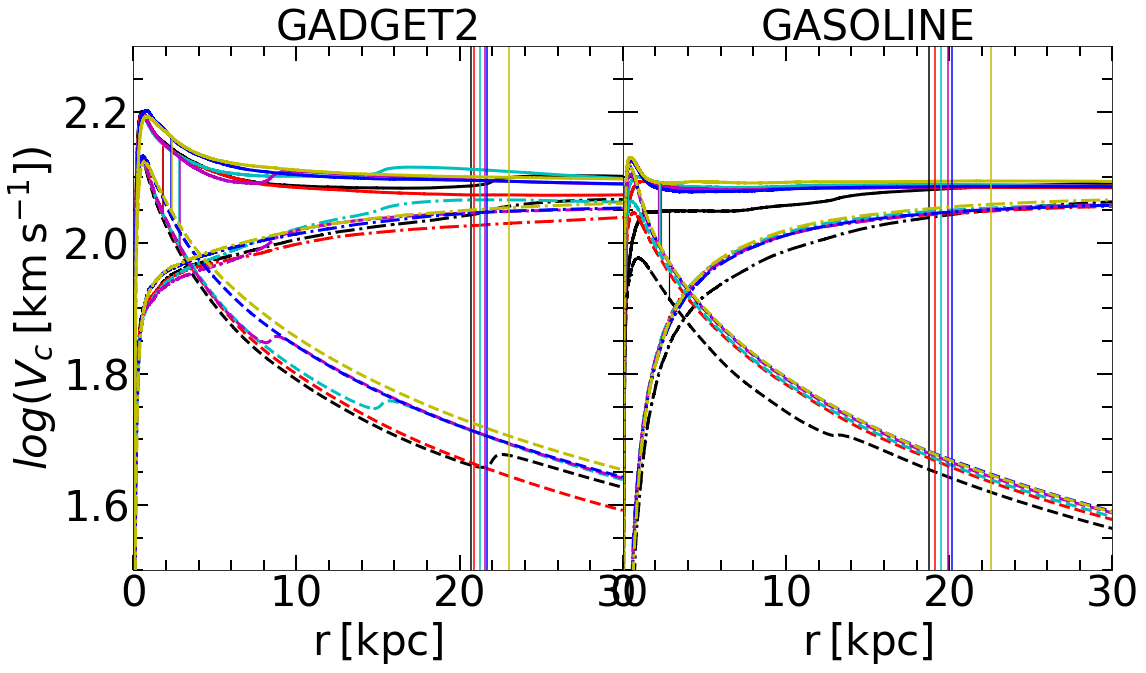

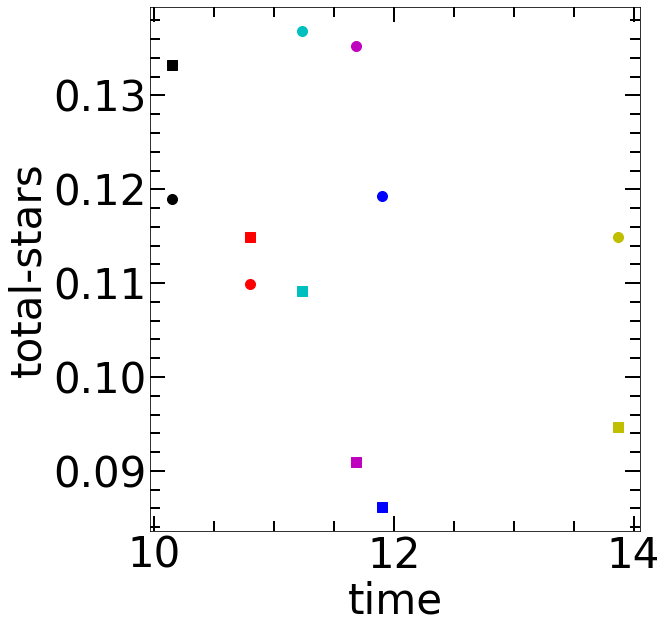

In [28]:
#Graficamos la veloc circular pero con la flecha de V200 y solo para los 3 halos mas grandes
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import sphviewer as sph
import numpy as np

colors = ('k','r','c','m','b','y')
vector = (1,2,4)
vector2 = ('M31', 'MW', 'M33')
G = 4.299e-6
a0 =1.

path = '/home/omarioni/'
atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]

# snapshot = np.loadtxt(path+'Gasoline/snapshots.txt', dtype='string')

snapshot = ('0752','0800','0832','0864','0880','1024') # Gasoline
isnap = np.array([357,381,397,414,422,496]) #Gadget

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))# sharey=True, sharex=True)
        #                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

fig1, ax1 = plt.subplots(figsize=(8, 8))
fig1.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)


for j in range(len(colors)):
    path = '/mnt/sersic2/omarioni/'
    snap = h5py.File(path + 'Gasoline/outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')

    cm   = snap['subhalo_002/Center'].value
    r200 = snap['subhalo_002/R200'].value
    a_gs = snap['subhalo_002/aexp'].value
    time = snap['subhalo_002/Time'].value

    print 'gasoline', time, a_gs

    pstr = snap['subhalo_002/Str/Coordinates'].value
    mstr = snap['subhalo_002/Str/Masses'].value
    vel  = snap['subhalo_002/Str/Velocities'].value

    pgas = snap['subhalo_002/Gas/Coordinates'].value
    mgas = snap['subhalo_002/Gas/Masses'].value

    pdrk = snap['subhalo_002/Drk/Coordinates'].value
    mdrk = snap['subhalo_002/Drk/Masses'].value

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0]) #*aexp
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = (pgas[:,0]-cm[0])
    ygas = (pgas[:,1]-cm[1])
    zgas = (pgas[:,2]-cm[2])
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = (pdrk[:,0]-cm[0])
    ydrk = (pdrk[:,1]-cm[1])
    zdrk = (pdrk[:,2]-cm[2])
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    v_x = vel[:,0] 
    v_y = vel[:,1] 
    v_z = vel[:,2]

#------------------------------------------------
    r200 = r200*a_gs

#     print 'r200=', r200
    rgal=0.15*r200

    limit    = np.where(rstr<rgal)
    r_sort   = np.sort(rstr[limit])
    r_indice = np.argsort(rstr[limit])

    limit_str   = np.where(rstr<r200)
    rstr_sort   = np.sort(rstr[limit_str])
    rstr_indice = np.argsort(rstr[limit_str])

    limit_gas   = np.where(rgas<r200)
    rgas_sort   = np.sort(rgas[limit_gas])
    rgas_indice = np.argsort(rgas[limit_gas])

    limit_drk   = np.where(rdrk<r200)
    rdrk_sort   = np.sort(rdrk[limit_drk])
    rdrk_indice = np.argsort(rdrk[limit_drk])


    Mgal_str = cumsum((mstr[limit])[r_indice])

    Mc_str = cumsum((mstr[limit_str])[rstr_indice])

    Mc_gas = cumsum((mgas[limit_gas])[rgas_indice])

    Mc_drk = cumsum((mdrk[limit_drk])[rdrk_indice])

#------------------ calculamos r90, r50------------------------------------------
    M_gal = Mgal_str[-1]

    razon       = Mgal_str/M_gal
    setentaycinco,= np.where(razon < 0.75)
    cincuenta,    = np.where(razon < 0.50)
    veinticinco,  = np.where(razon < 0.25)

    r75 = r_sort[setentaycinco][-1]
    r50_MWgs = r_sort[cincuenta][-1]
    r25 = r_sort[veinticinco][-1]
#--------------------------------------------------------------       
    rtot= concatenate([rstr, rgas, rdrk])
    mtot= concatenate([mstr, mgas, mdrk])

    limit_tot = np.where(rtot<r200)
    rtot_sort = np.sort(rtot[limit_tot])
    rtot_indice = np.argsort(rtot[limit_tot])

    Mc_tot = cumsum((mtot[limit_tot])[rtot_indice])

#--------------------------------------------------------------
    Mc_tot = Mc_tot[1:]
    Mc_str = Mc_str[1:]
    Mc_gas = Mc_gas[1:]
    Mc_drk = Mc_drk[1:]

    rtot_MWgs = rtot_sort[1:]
    rstr_MWgs = rstr_sort[1:]
    rgas_MWgs = rgas_sort[1:]
    rdrk_MWgs = rdrk_sort[1:]

    rgal_MWgs = rgal
    
    Vtot_MWgs = np.sqrt((G*Mc_tot)/rtot_MWgs)
    Vstr_MWgs = np.sqrt((G*Mc_str)/rstr_MWgs)
    Vgas_MWgs = np.sqrt((G*Mc_gas)/rgas_MWgs)
    Vdrk_MWgs = np.sqrt((G*Mc_drk)/rdrk_MWgs)
    
    dtot = np.absolute(r50_MWgs-rtot_MWgs)
    dstr = np.absolute(r50_MWgs-rstr_MWgs)
    lmax_MWgs = np.log10(Vtot_MWgs[np.argmin(dtot)])
    lmin_MWgs = np.log10(Vstr_MWgs[np.argmin(dstr)])
    
    print colors[j], lmax_MWgs-lmin_MWgs

#----------------------------------------------------------------------------------
###############################################################################################
    '''Acá calculo para MW de gadget'''

# vector = ('00','01','03')

    h=0.732
    G = 4.299e-6
    a0=1
    H0 = h*100
    omega_lambda=0.716
    omega_matter=0.1277/(h**2.)
    omega0 = omega_lambda + omega_matter

    
    path = '/mnt/is2/alejandro/ornella/'
    snap = h5py.File(path + 'outputs_1/snap_'+str('%03d'%isnap[j])+'.h5py', 'r')
    
    cm   = snap['subhalo_001/Center'].value
    r200 = snap['subhalo_001/R200'].value

    pstr = snap['subhalo_001/Str/Coordinates'].value
    mstr = snap['subhalo_001/Str/Masses'].value
    vel  = snap['subhalo_001/Str/Velocities'].value

    pgas = snap['subhalo_001/Gas/Coordinates'].value
    mgas = snap['subhalo_001/Gas/Masses'].value

    pdrk = snap['subhalo_001/Drk/Coordinates'].value
    mdrk = snap['subhalo_001/Drk/Masses'].value

    z = a0/aexp[isnap[j]] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    time = tiempo.conv(z, h, omega_lambda, omega_matter)

    print 'gadget', time, aexp[isnap[j]]

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp[isnap[j]]/h
    ystr = (pstr[:,1]-cm[1])*aexp[isnap[j]]/h
    zstr = (pstr[:,2]-cm[2])*aexp[isnap[j]]/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = (pgas[:,0]-cm[0])*aexp[isnap[j]]/h
    ygas = (pgas[:,1]-cm[1])*aexp[isnap[j]]/h
    zgas = (pgas[:,2]-cm[2])*aexp[isnap[j]]/h
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

    xdrk = (pdrk[:,0]-cm[0])*aexp[isnap[j]]/h
    ydrk = (pdrk[:,1]-cm[1])*aexp[isnap[j]]/h
    zdrk = (pdrk[:,2]-cm[2])*aexp[isnap[j]]/h
    rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)

    v_x = vel[:,0] *np.sqrt(aexp[isnap[j]]) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp[isnap[j]]) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp[isnap[j]]) + Ht *zstr/1000.
#----------------------masas----------------------------
    mstr = mstr/h
    mgas = mgas/h
    mdrk = mdrk/h

    r200 = r200*aexp[isnap[j]]/h

#     print 'r200 =', r200
    rgal=0.15*r200

    limit    = np.where(rstr<rgal)
    r_sort   = np.sort(rstr[limit])
    r_indice = np.argsort(rstr[limit])

    limit_str   = np.where(rstr<r200)
    rstr_sort   = np.sort(rstr[limit_str])
    rstr_indice = np.argsort(rstr[limit_str])

    limit_gas   = np.where(rgas<r200)
    rgas_sort   = np.sort(rgas[limit_gas])
    rgas_indice = np.argsort(rgas[limit_gas])

    limit_drk   = np.where(rdrk<r200)
    rdrk_sort   = np.sort(rdrk[limit_drk])
    rdrk_indice = np.argsort(rdrk[limit_drk])


    Mgal_str = cumsum((mstr[limit])[r_indice])

    Mc_str = cumsum((mstr[limit_str])[rstr_indice])

    Mc_gas = cumsum((mgas[limit_gas])[rgas_indice])

    Mc_drk = cumsum((mdrk[limit_drk])[rdrk_indice])

#------------------ calculamos r90, r50------------------------------------------
    M_gal = Mgal_str[-1]

    razon       = Mgal_str/M_gal
    setentaycinco,= np.where(razon < 0.75)
    cincuenta,    = np.where(razon < 0.50)
    veinticinco,  = np.where(razon < 0.25)

    r75 = r_sort[setentaycinco][-1]
    r50_MWgd = r_sort[cincuenta][-1]
    r25 = r_sort[veinticinco][-1]
#--------------------------------------------------------------       
    rtot = concatenate([rstr, rgas, rdrk])
    mtot = concatenate([mstr, mgas, mdrk])

    limit_tot   = np.where(rtot<r200)
    rtot_sort   = np.sort(rtot[limit_tot])
    rtot_indice = np.argsort(rtot[limit_tot])

    Mc_tot = cumsum((mtot[limit_tot])[rtot_indice])

    #print 'Mvir=', Mc_tot[-1], 'r50=', r50[-1]
#--------------------------------------------------------------
    rtot_MWgd = rtot_sort
    rstr_MWgd = rstr_sort
    rgas_MWgd = rgas_sort
    rdrk_MWgd = rdrk_sort
    
    rgal_MWgd = rgal

    Vtot_MWgd = np.sqrt((G*Mc_tot*1e10)/rtot_MWgd)
    Vstr_MWgd = np.sqrt((G*Mc_str*1e10)/rstr_MWgd)
    Vgas_MWgd = np.sqrt((G*Mc_gas*1e10)/rgas_MWgd)
    Vdrk_MWgd = np.sqrt((G*Mc_drk*1e10)/rdrk_MWgd)

    dtot = np.absolute(r50_MWgd-rtot_MWgd)
    dstr = np.absolute(r50_MWgd-rstr_MWgd)
    lmax_MWgd = np.log10(Vtot_MWgd[np.argmin(dtot)])
    lmin_MWgd = np.log10(Vstr_MWgd[np.argmin(dstr)])
    
    print colors[j], lmax_MWgd-lmin_MWgd
#----------------------------------------------------------------------------------------


    ax[0].plot(rtot_MWgd, np.log10(Vtot_MWgd), '-', lw=3, color=colors[j], label = 'Total')
    ax[0].plot(rstr_MWgd, np.log10(Vstr_MWgd), '--',lw=3, color=colors[j], label ='Stars')
    ax[0].plot(rdrk_MWgd, np.log10(Vdrk_MWgd), '-.',lw=3, color=colors[j], label ='Dark Matter')
    ax[0].axvline(x=r50_MWgd, ymin=(lmin_MWgd-1.5)/0.8, ymax=(lmax_MWgd-1.5)/0.8, lw=1.5,color=colors[j])
    ax[0].axvline(x=rgal_MWgd, lw=1.5,color=colors[j])
    
    
    ax[1].plot(rtot_MWgs, np.log10(Vtot_MWgs), '-', lw=3, color=colors[j], label = 'Total',zorder=1)
    ax[1].plot(rstr_MWgs, np.log10(Vstr_MWgs), '--',lw=3, color=colors[j], label ='Stars')
    # ax[1].plot(rgas_MWgs, Vgas_MWgs, ':', color ='#FF0000',lw=4, label='Gas')
    ax[1].plot(rdrk_MWgs, np.log10(Vdrk_MWgs), '-.',lw=3, color=colors[j], label ='Dark Matter')
    ax[1].axvline(x=r50_MWgs, ymin=(lmin_MWgs-1.5)/0.8, ymax=(lmax_MWgs-1.5)/0.8, lw=1.2,color=colors[j])
    ax[1].axvline(x=rgal_MWgs, lw=1.5,color=colors[j])
    
    
    ax1.plot(time, lmax_MWgd-lmin_MWgd, 'o',markersize=10,color=colors[j])
    ax1.plot(time, lmax_MWgs-lmin_MWgs, 's', markersize=10,color=colors[j])
ax1.set_ylabel(r'total-stars',fontsize=42)
ax1.set_xlabel(r'time',fontsize=42)
ax1.minorticks_on()
ax1.tick_params( labelsize=42)
ax1.tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax1.tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

    
ax[0].set_ylim(1.5,2.3)
ax[0].set_xlim(0,30)
ax[0].set_ylabel(r'$log(V_{c}\:\mathrm{[km\:s^{-1}]})$', fontsize=42)
ax[0].set_xlabel(r'$\mathrm{r\:[kpc]}$',fontsize=42)
# ax[0].set_xticklabels([])
ax[0].minorticks_on()
ax[0].tick_params( labelsize=42)
ax[0].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[0].set_title('GADGET2', loc='center', fontsize=42)

    #------------------------------------------------------
ax[1].set_xlabel(r'$\mathrm{r\:[kpc]}$',fontsize=42)
ax[1].set_ylim(1.5,2.3)
ax[1].set_xlim(0,30)
ax[1].set_yticklabels([])
# ax[1].set_yscale('log')
ax[1].minorticks_on()
ax[1].tick_params( labelsize=42)
ax[1].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[1].set_title('GASOLINE', loc='center', fontsize=42)

plt.show()


In [90]:
lmin_MWgd

2.0455139

In [ ]:
#         data_tot = np.zeros([np.size(rtot_sort),3])
#         data_tot[:,0]= rtot_sort
#         data_tot[:,1]= Vtot
#         data_tot[:,2]= Mc_tot

#         data_str = np.zeros([np.size(rstr_sort),3])
#         data_str[:,0]= rstr_sort
#         data_str[:,1]= Vstr
#         data_str[:,2]= Mc_str

#         data_gas = np.zeros([np.size(rgas_sort),3])
#         data_gas[:,0]= rgas_sort
#         data_gas[:,1]= Vgas
#         data_gas[:,2]= Mc_gas

#         data_drk = np.zeros([np.size(rdrk_sort),3])
#         data_drk[:,0]= rdrk_sort
#         data_drk[:,1]= Vdrk
#         data_drk[:,2]= Mc_drk

#         data = np.ndarray([5,1])
#         data[0] = r200
#         data[1] = r50
#         data[2] = r25
#         data[3] = r75
#         data[4] = M_gal

#         np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_Vtot_tbar2.dat', data_tot)
#         np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_Vstr_tbar2.dat', data_str)
#         np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_Vgas_tbar2.dat', data_gas)
#         np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_Vdrk_tbar2.dat', data_drk)
#         np.savetxt('/home/omarioni/Barras_GdGs/Barras_Gs/_data/'+str('%s'%vector2[i])+'_radios_tbar2.dat', data)
    
    #tbar2 es cuando el fdisk cambia mucho

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))# sharey=True, sharex=True)
        #                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

ax[0].plot(rtot_MWgd, Vtot_MWgd, '-', lw=4, color='#801414', label= 'Total')
ax[0].plot(rstr_MWgd, Vstr_MWgd, '--',lw=4, color='#801414', label ='Stars')
ax[0].plot(rdrk_MWgd, Vdrk_MWgd, '-.',color='#801414', lw=4, label='Dark Matter')
# ax[0].set_ylim(0,200)
ax[0].set_ylim(50,170)

ax[0].set_xlim(0,5)
ax[0].set_ylabel(r'$V_{c}\:\mathrm{[km\:s^{-1}]}$', fontsize=42)
# ax[0].set_xticks([0,5,10,15,20,25,30])
# ax[0].set_yticks([50,100,150,200])
ax[0].set_xticklabels([])
ax[0].minorticks_on()
ax[0].tick_params( labelsize=42)
ax[0].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')
ax[0].set_yscale('log')
# ax[0].set_xscale('log')

ax[0].arrow(x=r50_MWgd,y=10,dx=0,dy=-10,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)
ax[0].arrow(x=r200_MWgd*0.15,y=10,dx=0,dy=-10,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)

# ax[0,0].arrow(x=rcor_M31gd,y=200,dx=0,dy=-30,color='k', lw=3.5,
#              head_length=8,head_width=1,length_includes_head=True)

# ax[0].arrow(x=25,y=Vtot_MWgd[-1],dx=5,dy=0,color='k', lw=3.5,
#              head_length=1.2,head_width=6,length_includes_head=True, zorder=1)

ax[0].set_title('GADGET2', loc='center', fontsize=42)

#------------------------------------------------------

ax[1].plot(rtot, Vtot, '-', lw=4, color='#FF963E', label= 'Total',zorder=1)
ax[1].plot(rstr, Vstr, '--',lw=4, color='#FF963E', label ='Stars')
# ax[1].plot(rgas_MWgs, Vgas_MWgs, ':', color ='#FF0000',lw=4, label='Gas')
ax[1].plot(rdrk, Vdrk, '-.',color='#FF963E', lw=4, label='Dark Matter')

ax[1].set_ylim(50,170)
ax[1].set_xlim(0,5)
# ax[1].set_xticks([0,5,10,15,20,25,30])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_yscale('log')
# ax[1].set_xscale('log')
ax[1].minorticks_on()
ax[1].tick_params( labelsize=42)
ax[1].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[1].arrow(x=r50_MWgs,y=10,dx=0,dy=-10,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)

ax[1].arrow(x=r200_MWgs*0.15,y=10,dx=0,dy=-10,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)

# ax[0,1].arrow(x=rcor_M31gs,y=200,dx=0,dy=-30,color='k', lw=3.5,
#              head_length=8,head_width=1,length_includes_head=True)

# ax[1].arrow(x=25,y=Vtot_MWgs[-1],dx=5,dy=0,color='k', lw=3.5,
#              head_length=1.2,head_width=6,length_includes_head=True, zorder=2)

ax[1].set_title('GASOLINE', loc='center', fontsize=42)

plt.show()


### Leemos los datos

In [3]:
path = '/home/omarioni/'

MW_gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_Vtot_tbar2.dat')
rtot_MWgd = MW_gd[:,0]
Vtot_MWgd = MW_gd[:,1]
Mtot_MWgd = MW_gd[:,2]

MW_gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_Vstr_tbar2.dat')
rstr_MWgd = MW_gd[:,0]
Vstr_MWgd = MW_gd[:,1]
Mstr_MWgd = MW_gd[:,2]

MW_gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_Vgas_tbar2.dat')
rgas_MWgd = MW_gd[:,0]
Vgas_MWgd = MW_gd[:,1]
Mgas_MWgd = MW_gd[:,2]

MW_gd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_Vdrk_tbar2.dat')
rdrk_MWgd = MW_gd[:,0]
Vdrk_MWgd = MW_gd[:,1]
Mdrk_MWgd = MW_gd[:,2]

#----------------------------------------------------------------------------------------

MW_gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_Vtot_tbar2.dat')
rtot_MWgs = MW_gs[:,0]
Vtot_MWgs = MW_gs[:,1]
Mtot_MWgs = MW_gs[:,2]

MW_gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_Vstr_tbar2.dat')
rstr_MWgs = MW_gs[:,0]
Vstr_MWgs = MW_gs[:,1]
Mstr_MWgs = MW_gs[:,2]

MW_gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_Vgas_tbar2.dat')
rgas_MWgs = MW_gs[:,0]
Vgas_MWgs = MW_gs[:,1]
Mgas_MWgs = MW_gs[:,2]

MW_gs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_Vdrk_tbar2.dat')
rdrk_MWgs = MW_gs[:,0]
Vdrk_MWgs = MW_gs[:,1]
Mdrk_MWgs = MW_gs[:,2]


In [2]:
path = '/home/omarioni/'

radios_MWgd  = np.loadtxt(path + 'Barras_GdGs/Barras_Gd/_data/MW_radios_tbar2.dat')
r200_MWgd = radios_MWgd[0]
r50_MWgd  = radios_MWgd[1]
r25_MWgd  = radios_MWgd[2]
r75_MWgd  = radios_MWgd[3]
Mgal_MWgd = radios_MWgd[4]


radios_MWgs  = np.loadtxt(path + 'Barras_GdGs/Barras_Gs/_data/MW_radios_tbar2.dat')
r200_MWgs = radios_MWgs[0]
r50_MWgs  = radios_MWgs[1]
r25_MWgs  = radios_MWgs[2]
r75_MWgs  = radios_MWgs[3]
Mgal_MWgs = radios_MWgs[4]


In [43]:
print r50_MWgd
print r50_MWgs


2.252042055130005
2.1840648651123047


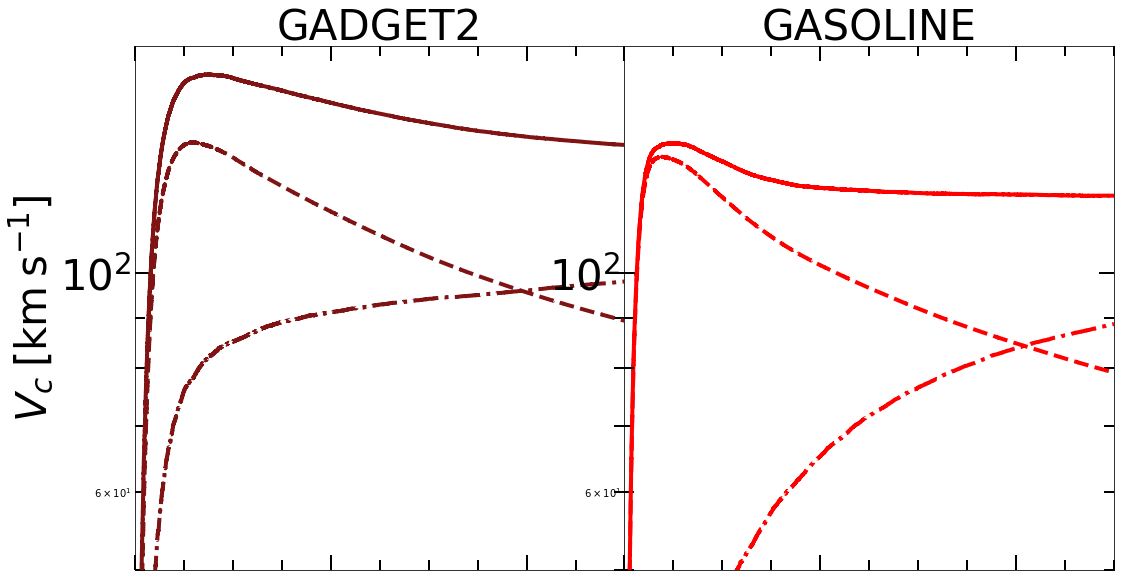

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

ax[0].plot(rtot_MWgd, Vtot_MWgd, '-', lw=4, color='#801414', label= 'Total')
ax[0].plot(rstr_MWgd, Vstr_MWgd, '--',lw=4, color='#801414', label ='Stars')
# ax[0].plot(rgas_MWgd, Vgas_MWgd, ':', color ='#801414',lw=4, label='Gas')
ax[0].plot(rdrk_MWgd, Vdrk_MWgd, '-.',color='#801414', lw=4, label='Dark Matter')
# ax[0].set_ylim(0,200)
ax[0].set_ylim(50,170)

ax[0].set_xlim(0,5)
ax[0].set_ylabel(r'$V_{c}\:\mathrm{[km\:s^{-1}]}$', fontsize=42)
# ax[0].set_xticks([0,5,10,15,20,25,30])
# ax[0].set_yticks([50,100,150,200])
ax[0].set_xticklabels([])
ax[0].minorticks_on()
ax[0].tick_params( labelsize=42)
ax[0].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')
ax[0].set_yscale('log')
# ax[0].set_xscale('log')

ax[0].arrow(x=r50_MWgd,y=10,dx=0,dy=-10,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)
ax[0].arrow(x=r200_MWgd*0.15,y=10,dx=0,dy=-10,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)

# ax[0,0].arrow(x=rcor_M31gd,y=200,dx=0,dy=-30,color='k', lw=3.5,
#              head_length=8,head_width=1,length_includes_head=True)

# ax[0].arrow(x=25,y=Vtot_MWgd[-1],dx=5,dy=0,color='k', lw=3.5,
#              head_length=1.2,head_width=6,length_includes_head=True, zorder=1)


# ax[0].text(24, Vtot_MWgd[-1], '$\mathrm{V_{vir}}$', fontsize=42, color='black', ha='left', va='bottom')
# ax[0].text(r50_MWgd+0.5, 30, '$\mathrm{r_{50}}$', fontsize=42, color='black', ha='center', va='bottom')
# ax[0].text(r200_MWgd*0.15, 30, '$\mathrm{r_{gal}}$', fontsize=42, color='black', ha='center', va='bottom')
# ax[0].text(rcor_MWgd+0.5, 178, '$R_\mathrm{corot}}$', fontsize=42, color='black', ha='left', va='bottom')


# ax[0].text(28, 165, '$f_\mathrm{disk} = 0.85$', fontsize=38, color='black', ha='right', va='center')
# ax[0].text(28, 180, '$\mathrm{A}$', fontsize=42, color='black',ha='right', va='bottom')

# ax[0].text(10, 40, '$\mathrm{Gas}$', fontsize=38, color='k', ha='left', va='center')
# ax[0].text(10, 75, '$\mathrm{Stars}$', fontsize=38, color='k', ha='left', va='center')
# ax[0].text(10, 110, '$\mathrm{Dark\:Matter}$', fontsize=38, color='k', ha='left', va='center')
# ax[0].text(10, 130, '$\mathrm{Total}$', fontsize=38, color='k', ha='left', va='center')

ax[0].set_title('GADGET2', loc='center', fontsize=42)

#------------------------------------------------------

# # ax2=fig.add_subplot(222)
ax[1].plot(rtot_MWgs, Vtot_MWgs, '-', lw=4, color='#FF0000', label= 'Total',zorder=1)
ax[1].plot(rstr_MWgs, Vstr_MWgs, '--',lw=4, color='#FF0000', label ='Stars')
# ax[1].plot(rgas_MWgs, Vgas_MWgs, ':', color ='#FF0000',lw=4, label='Gas')
ax[1].plot(rdrk_MWgs, Vdrk_MWgs, '-.',color='#FF0000', lw=4, label='Dark Matter')

ax[1].set_ylim(50,170)
ax[1].set_xlim(0,5)
# ax[1].set_xticks([0,5,10,15,20,25,30])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_yscale('log')
# ax[1].set_xscale('log')
ax[1].minorticks_on()
ax[1].tick_params( labelsize=42)
ax[1].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[1].arrow(x=r50_MWgs,y=10,dx=0,dy=-10,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)

ax[1].arrow(x=r200_MWgs*0.15,y=10,dx=0,dy=-10,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)

# ax[0,1].arrow(x=rcor_M31gs,y=200,dx=0,dy=-30,color='k', lw=3.5,
#              head_length=8,head_width=1,length_includes_head=True)

# ax[1].arrow(x=25,y=Vtot_MWgs[-1],dx=5,dy=0,color='k', lw=3.5,
#              head_length=1.2,head_width=6,length_includes_head=True, zorder=2)

# ax[0,1].text(28, 180, '$\mathrm{A}$', fontsize=42, color='black',ha='right', va='bottom')
# ax[0,1].text(28, 165, '$f_\mathrm{disk} = 0.75$', fontsize=38, color='black', ha='right', va='center')


ax[1].set_title('GASOLINE', loc='center', fontsize=42)

plt.show()

### Tiempo en fdisk

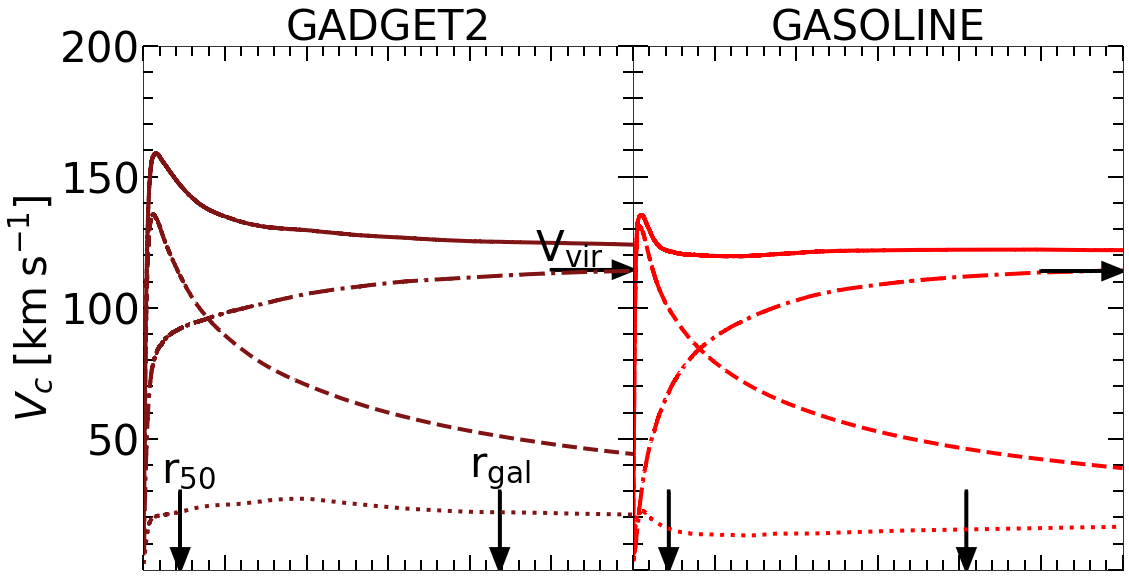

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.06, left =0.12, right = 0.97, top = 0.97, wspace=0., hspace= 0)

ax[0].plot(rtot_MWgd, Vtot_MWgd, '-', lw=4, color='#801414', label= 'Total')
ax[0].plot(rstr_MWgd, Vstr_MWgd, '--',lw=4, color='#801414', label ='Stars')
ax[0].plot(rgas_MWgd, Vgas_MWgd, ':', color ='#801414',lw=4, label='Gas')
ax[0].plot(rdrk_MWgd, Vdrk_MWgd, '-.',color='#801414', lw=4, label='Dark Matter')
ax[0].set_ylim(0,200)
ax[0].set_xlim(0,30)
ax[0].set_ylabel(r'$V_{c}\:\mathrm{[km\:s^{-1}]}$', fontsize=42)
ax[0].set_xticks([0,5,10,15,20,25,30])
ax[0].set_yticks([50,100,150,200])
ax[0].set_xticklabels([])
ax[0].minorticks_on()
ax[0].tick_params( labelsize=42)
ax[0].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[0].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[0].arrow(x=r50_MWgd,y=30,dx=0,dy=-30,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)
ax[0].arrow(x=r200_MWgd*0.15,y=30,dx=0,dy=-30,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)

# ax[0,0].arrow(x=rcor_M31gd,y=200,dx=0,dy=-30,color='k', lw=3.5,
#              head_length=8,head_width=1,length_includes_head=True)

ax[0].arrow(x=25,y=Vtot_MWgd[-1],dx=5,dy=0,color='k', lw=3.5,
             head_length=1.2,head_width=6,length_includes_head=True, zorder=1)


ax[0].text(24, Vtot_MWgd[-1], '$\mathrm{V_{vir}}$', fontsize=42, color='black', ha='left', va='bottom')
ax[0].text(r50_MWgd+0.5, 30, '$\mathrm{r_{50}}$', fontsize=42, color='black', ha='center', va='bottom')
ax[0].text(r200_MWgd*0.15, 30, '$\mathrm{r_{gal}}$', fontsize=42, color='black', ha='center', va='bottom')
# ax[0].text(rcor_MWgd+0.5, 178, '$R_\mathrm{corot}}$', fontsize=42, color='black', ha='left', va='bottom')


# ax[0].text(28, 165, '$f_\mathrm{disk} = 0.85$', fontsize=38, color='black', ha='right', va='center')
# ax[0].text(28, 180, '$\mathrm{A}$', fontsize=42, color='black',ha='right', va='bottom')

# ax[0].text(10, 40, '$\mathrm{Gas}$', fontsize=38, color='k', ha='left', va='center')
# ax[0].text(10, 75, '$\mathrm{Stars}$', fontsize=38, color='k', ha='left', va='center')
# ax[0].text(10, 110, '$\mathrm{Dark\:Matter}$', fontsize=38, color='k', ha='left', va='center')
# ax[0].text(10, 130, '$\mathrm{Total}$', fontsize=38, color='k', ha='left', va='center')

ax[0].set_title('GADGET2', loc='center', fontsize=42)

#------------------------------------------------------

# # ax2=fig.add_subplot(222)
ax[1].plot(rtot_MWgs, Vtot_MWgs, '-', lw=4, color='#FF0000', label= 'Total',zorder=1)
ax[1].plot(rstr_MWgs, Vstr_MWgs, '--',lw=4, color='#FF0000', label ='Stars')
ax[1].plot(rgas_MWgs, Vgas_MWgs, ':', color ='#FF0000',lw=4, label='Gas')
ax[1].plot(rdrk_MWgs, Vdrk_MWgs, '-.',color='#FF0000', lw=4, label='Dark Matter')

ax[1].set_ylim(0,200)
ax[1].set_xlim(0,30)
ax[1].set_xticks([0,5,10,15,20,25,30])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

ax[1].minorticks_on()
ax[1].tick_params( labelsize=42)
ax[1].tick_params('both', length=10, width=2,which='minor', direction='in', right='on',top='on')
ax[1].tick_params('both', length=15, width=2,which='major', direction='in', right='on',top='on')

ax[1].arrow(x=r50_MWgs,y=30,dx=0,dy=-30,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)
ax[1].arrow(x=r200_MWgs*0.15,y=30,dx=0,dy=-30,color='k', lw=3.5,
             head_length=8,head_width=1,length_includes_head=True)

# ax[0,1].arrow(x=rcor_M31gs,y=200,dx=0,dy=-30,color='k', lw=3.5,
#              head_length=8,head_width=1,length_includes_head=True)

ax[1].arrow(x=25,y=Vtot_MWgs[-1],dx=5,dy=0,color='k', lw=3.5,
             head_length=1.2,head_width=6,length_includes_head=True, zorder=2)

# ax[0,1].text(28, 180, '$\mathrm{A}$', fontsize=42, color='black',ha='right', va='bottom')
# ax[0,1].text(28, 165, '$f_\mathrm{disk} = 0.75$', fontsize=38, color='black', ha='right', va='center')


ax[1].set_title('GASOLINE', loc='center', fontsize=42)

plt.show()

In [50]:
path = '/home/omarioni/'
atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]


path = '/mnt/is2/alejandro/ornella/'

for i in range(len(aexp)):
        z = a0/aexp[i]- 1.
        Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
        time = tiempo.conv(z, h, omega_lambda, omega_matter)
        
        print atime[i,0], aexp[i], time

0.0 0.02381 0.06701972133298545
1.0 0.03175 0.10319890627862219
2.0 0.03969 0.14423627997312585
3.0 0.04448 0.171117526028094
4.0 0.04914 0.19869795058472142
5.0 0.0538 0.22761769248328823
6.0 0.05846 0.25781681537528633
7.0 0.06312 0.28924261152570135
8.0 0.06709 0.31694762514189806
9.0 0.071 0.3450453529010579
10.0 0.07491 0.37392524523073517
11.0 0.07882 0.40356610058672443
12.0 0.08273 0.4339482510710456
13.0 0.08627 0.46207942662871615
14.0 0.08976 0.4903809471539854
15.0 0.09325 0.5192345093787025
16.0 0.09675 0.5487141734011795
17.0 0.1002 0.5782951071970964
18.0 0.1035 0.6070663744140851
19.0 0.1067 0.6354030273047302
20.0 0.1099 0.6641631417370005
21.0 0.1131 0.6933400106243451
22.0 0.1163 0.7229271778571534
23.0 0.1194 0.751975137012184
24.0 0.1224 0.7804419771765004
25.0 0.1254 0.8092540435554048
26.0 0.1285 0.8393842508128202
27.0 0.1315 0.8688840728672537
28.0 0.1343 0.8967164313661873
29.0 0.1372 0.9258435421101324
30.0 0.14 0.9542531483684857
31.0 0.1429 0.98397093698747

In [49]:
import h5py
import rotation_mio as rot
import barstrength2 as strng

a0=1

vector = (1,2,4)
vector2 = ('M31', 'MW','M33')

#path = 'home/ornela/SimCLUES/'
path = '/mnt/sersic2/omarioni/'

snapshot = np.loadtxt(path + 'Gasoline/snapshots.txt', dtype='string')


for j in range(len(snapshot)-1,0,-1):
    snap = h5py.File(path + 'Gasoline/outputs2/snap_'+str('%s'%snapshot[j])+'.h5py', 'r')

    time = snap['subhalo_001/Time'].value
    aexp = snap['subhalo_001/aexp'].value
    
    print j, snapshot[j], time, aexp

59 1024 13.729565519987414 1.0000000000140292
58 1008 13.515321632086817 0.9840854832450174
57 0992 13.30107774418595 0.9683306222125518
56 0976 13.086833856285102 0.9527313129907985
55 0960 12.872589968384355 0.9372834409065818
54 0944 12.65834608048369 0.9219828775848915
53 0928 12.444102192583028 0.9068254778372923
52 0912 12.22985830468233 0.891807076378411
51 0896 12.015614416783436 0.8769234843541752
50 0880 11.801370528883313 0.8621704856628021
49 0864 11.587126640982719 0.8475438330498616
48 0848 11.372882753082049 0.8330392439527204
47 0832 11.158638865181278 0.818652396070184
46 0816 10.944394977280524 0.804378922628607
45 0800 10.730151089381387 0.7902144073125708
44 0784 10.515907201480614 0.7761543788235893
43 0768 10.301663313580919 0.7621943050279477
42 0752 10.087419425680089 0.7483295866452315
41 0736 9.873175537781265 0.7345555504283752
40 0720 9.658931649880785 0.7208674417732805
39 0704 9.444687761981976 0.7072604166937579
38 0688 9.230443874081969 0.693729533081392

In [6]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import time_conversion as tiempo

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
vector2 = ('M31','MW','M33')
vector = ('00','01','03')

#path = 'home/ornela/SimCLUES/'
path = '/home/omarioni/'

atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]
# aexp = aexp[::-1]

path = '/mnt/is2/alejandro/ornella/'

snapshot=range(496,50,-1)
for isnap in snapshot:
    snap = h5py.File(path + 'outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
#     print aexp[isnap]

#     lala

    for i in range(0,3):
        cm   = snap['subhalo_0'+ str('%s'%vector[i])+ '/Center'].value
        r200 = snap['subhalo_0'+ str('%s'%vector[i])+ '/R200'].value

        pstr = snap['subhalo_0'+ str('%s'%vector[i])+ '/Str/Coordinates'].value
        mstr = snap['subhalo_0'+ str('%s'%vector[i])+ '/Str/Masses'].value
        vel  = snap['subhalo_0'+ str('%s'%vector[i])+ '/Str/Velocities'].value
        
        pgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Coordinates'].value
        mgas = snap['subhalo_0'+ str('%s'%vector[i])+ '/Gas/Masses'].value
        
        pdrk = snap['subhalo_0'+ str('%s'%vector[i])+ '/Drk/Coordinates'].value
        mdrk = snap['subhalo_0'+ str('%s'%vector[i])+ '/Drk/Masses'].value

        z = a0/aexp[isnap] - 1.
        Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
        time = tiempo.conv(z, h, omega_lambda, omega_matter)

    #---aca paso las coordenadas respecto al centro de la galaxia------
        xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
        ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
        zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
        rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
        
        xgas = (pgas[:,0]-cm[0])*aexp[isnap]/h
        ygas = (pgas[:,1]-cm[1])*aexp[isnap]/h
        zgas = (pgas[:,2]-cm[2])*aexp[isnap]/h
        rgas = np.sqrt(xgas**2+ygas**2+zgas**2)
        
        xdrk = (pdrk[:,0]-cm[0])*aexp[isnap]/h
        ydrk = (pdrk[:,1]-cm[1])*aexp[isnap]/h
        zdrk = (pdrk[:,2]-cm[2])*aexp[isnap]/h
        rdrk = np.sqrt(xdrk**2+ydrk**2+zdrk**2)
         
        v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
        v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
        v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.
        
#----------------------masas----------------------------
        mstr = mstr/h
        mgas = mgas/h
        mdrk = mdrk/h
        
        r200 = r200*aexp[isnap]/h
        
#         print 'r200 =', r200
        rgal=0.15*r200
        
        limit    = np.where(rstr<rgal)
        r_sort   = np.sort(rstr[limit])
        r_indice = np.argsort(rstr[limit])
        
        Mgal_str = cumsum((mstr[limit])[r_indice])
        M_gal = Mgal_str[-1]
    

    #------------------ calculamos M90------------------------------------------
        razon  = Mgal_str/M_gal
        cincuenta,    = np.where(razon < 0.50)

        r50 = r_sort[cincuenta][-1]
        M50 = Mgal_str[cincuenta][-1]

    #--------------------------------------------         
        rtot = concatenate([rstr, rgas, rdrk])
        mtot = concatenate([mstr, mgas, mdrk])
        
        limit_tot   = np.where(rtot<r200)
        rtot_sort   = np.sort(rtot[limit_tot])
        rtot_indice = np.argsort(rtot[limit_tot])
        
        Mc_tot = cumsum((mtot[limit_tot])[rtot_indice])
        
        Mtot_50 = Mc_tot[np.where(rtot_sort < r50)][-1]
#-------------------------------------------------------------- 

        Vr50 = np.sqrt((G*Mtot_50*1e10)/r50)
        
        fdisk = Vr50 / np.sqrt((G*M_gal*1e10)/r50)
        
#         print fdisk
        
#--------------------------------------------------------------------------------------------------------------------

#         archivo1 =  open('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_fdisk_time.dat','a')
#         archivo1.write(str('%12.6f'% time) +'\t'+
#                        str('%12.6f'% fdisk) +'\t'+
#                        str('%12.6f'% r50) +'\t'+
#                        str('%12.6f'% (M_gal*1e10)) +'\t'+
#                        str('%12.6f'% (M50*1e10)) +'\t'+
#                        str('%12.6f'% (Mgas_50*1e10)) +'\t'+
#                        str('%12.6f'% (Mdrk_50*1e10)) +'\t'+
#                        str('%12.6f'% Vr50) +'\n')
#         archivo1.close()   
        
        archivo =  open('/home/omarioni/Barras_GdGs/Barras_Gd/_data/'+str('%s'%vector2[i])+'_fdisk_time.dat','a')
        archivo.write(str('%12.6f'% time) +'\t'+
                      str('%12.6f'% fdisk) +'\n')
        archivo.close()

/home/omarioni/miniconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


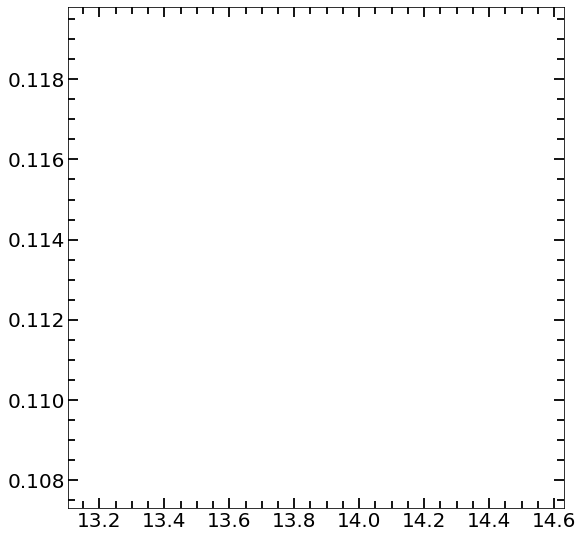

In [2]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import barstrength2 as strng
import numpy as np
import time_conversion as tiempo

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

path = '/home/omarioni/'

atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]

vector = ('00','01','03')
vector3 = ('M31','MW','M33')
vector2= ('blue', 'red', 'green')

# snap = h5py.File('/home/ornela/SimCLUES/outputs_1/snap_496.h5py', 'r')
path = '/mnt/is2/alejandro/ornella/'

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
# #                        gridspec_kw = {'height_ratios':[3,1,3,1]})
# fig.subplots_adjust(bottom=0.10, left =0.11, right = 0.97, top = 0.97)

# snapshot= np.array([357,381,397,414,422,463,447,496])

j=0
snapshot=range(496,495,-1)

n = len(snapshot)
colors = plt.cm.jet(np.linspace(0,1,n))

time = np.zeros(n)
A2max= np.zeros(n)
for isnap in snapshot:
    snap = h5py.File(path+'outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    for i in range(1,2):
        
        cm   = snap['subhalo_0'+ str('%s' %vector[i])+ '/Center'].value
        r200 = snap['subhalo_0'+ str('%s' %vector[i])+ '/R200'].value

        pstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Coordinates'].value
        mstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Masses'].value
        vel  = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Velocities'].value

        z = a0/aexp[isnap] - 1.
        Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
        time[j] = tiempo.conv(z, h, omega_lambda, omega_matter)
        
#         print isnap, time[j]
    #---aca paso las coordenadas respecto al centro de la galaxia------
        xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
        ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
        zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
        r    = np.sqrt(xstr**2+ystr**2+zstr**2)

        v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
        v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
        v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.

    #----------------------masas----------------------------
        mstr = mstr/h

        r200 = r200*aexp[isnap]/h

        rgal=0.15*r200

        limit = np.where(r<rgal)
        r_sort = np.sort(r[limit])
        r_indice = np.argsort(r[limit])

        Mc_str = np.cumsum((mstr[limit])[r_indice])
        M_gal = Mc_str[-1]

    #------------------ calculamos M90------------------------------------------
        razon = Mc_str/M_gal
        noventa, = np.where(razon < 0.9)
        cincuenta, = np.where(razon < 0.5)

        r90 = r_sort[noventa][-1]
        r50 = r_sort[cincuenta][-1]            

    #-------------------------------------------------------------------            
#         corte1,=np.where(r<3*aexp[isnap])
        corte1,=np.where(r<3*aexp[isnap])
        veloc,=np.where(r<2*aexp[isnap])

    #----------componentes de la velocidad del centro de masa------------
        vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
        vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
        vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

    #----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
        vx = v_x - vxcm
        vy = v_y - vycm
        vz = v_z - vzcm

        e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,3*aexp[isnap])

        xn = e1x*xstr + e1y*ystr + e1z*zstr
        yn = e2x*xstr + e2y*ystr + e2z*zstr
        zn = e3x*xstr + e3y*ystr + e3z*zstr
        vxn = e1x*vx + e1y*vy + e1z*vz
        vyn = e2x*vx + e2y*vy + e2z*vz
        vzn = e3x*vx + e3y*vy + e3z*vz


        A2max[j], rmax, phimax = strng.a2max(mstr[corte1], xn[corte1], yn[corte1], 20)
#         print isnap, str('%2.15f' %time[j]), '    A2max=',str('%2.15f' %A2max[j]), 'rbinmax=', rmax

#         A2, phi, rbin = strng.a2(mstr[corte1], xn[corte1], yn[corte1], 20)
        
#         ax.plot(rbin,A2,'-', lw=1.5, color=colors[j])
#         ax.axvline(x=rmax,ls='--',color=colors[j],lw=1)
        j = j+1

# ax.set_ylabel(r'$A_{\mathrm{2}}$', fontsize=20, fontname='Times')
# ax.set_xlabel(u'$R\:\mathrm{[kpc]}$', fontsize=20)
# # ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5])
# # ax.set_xticks([0,1,2,3,4,5])
# ax.set_ylim(0,0.5)
# # ax.set_xlim(0,5)

# ax.minorticks_on()
# ax.tick_params( labelsize=20)
# ax.tick_params('both', length=7,  width=1.8, which='minor', direction='in', right='true',top='true')
# ax.tick_params('both', length=10, width=1.8, which='major', direction='in', right='true',top='true')

fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig2.subplots_adjust(bottom=0.10, left =0.11, right = 0.97, top = 0.97)
ax2.plot(time,A2max,'-',lw=2.5, color='k')
ax2.minorticks_on()
ax2.tick_params( labelsize=20)
ax2.tick_params('both', length=7,  width=1.8, which='minor', direction='in', right='on',top='on')
ax2.tick_params('both', length=10, width=1.8, which='major', direction='in', right='on',top='on')
# plt.colorbar()
plt.show()

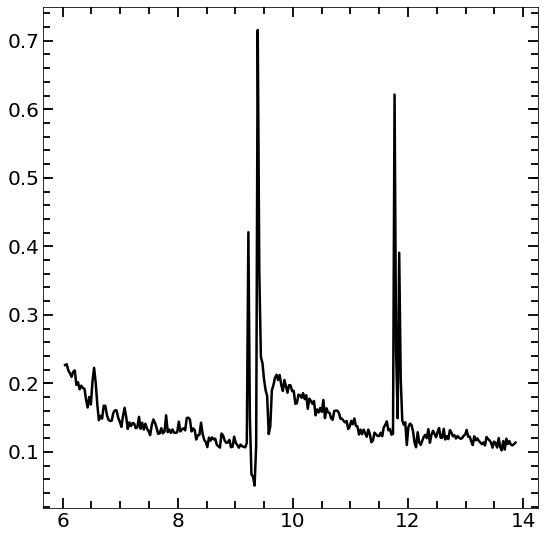

In [2]:
fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig2.subplots_adjust(bottom=0.10, left =0.11, right = 0.97, top = 0.97)
ax2.plot(time,A2max,'-',lw=2.5, color='k')
ax2.minorticks_on()
ax2.tick_params( labelsize=20)
ax2.tick_params('both', length=7,  width=1.8, which='minor', direction='in', right='on',top='on')
ax2.tick_params('both', length=10, width=1.8, which='major', direction='in', right='on',top='on')
# plt.colorbar()
plt.show()

/home/omarioni/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:124: RuntimeWarning: divide by zero encountered in divide
/home/omarioni/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:124: RuntimeWarning: invalid value encountered in divide


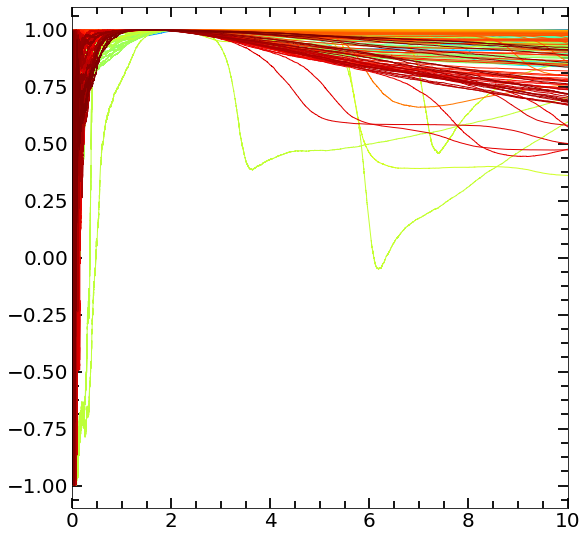

In [25]:
import matplotlib.pyplot as plt
import h5py
import rotation_mio as rot
import barstrength2 as strng
import numpy as np
import time_conversion as tiempo

h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

# colors = ('k','r','c','m','b','g','purple','y')
#path = 'home/ornela/SimCLUES/'
path = '/home/omarioni/'

atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]

vector = ('00','01','03')
vector3 = ('M31','MW','M33')
vector2= ('blue', 'red', 'green')

# snap = h5py.File('/home/ornela/SimCLUES/outputs_1/snap_496.h5py', 'r')
path = '/mnt/is2/alejandro/ornella/'

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
#                        gridspec_kw = {'height_ratios':[3,1,3,1]})
fig.subplots_adjust(bottom=0.10, left =0.11, right = 0.97, top = 0.97)

# snapshot= np.array([357,381,397,414,422,496])

snapshot=range(496,207,-1)

n = len(snapshot)
colors = plt.cm.jet(np.linspace(0,1,n))

j=0
# snapshot=range(496,50,-1)
for isnap in snapshot:
    snap = h5py.File(path+'outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    i = 1
        
    cm   = snap['subhalo_0'+ str('%s' %vector[i])+ '/Center'].value
    r200 = snap['subhalo_0'+ str('%s' %vector[i])+ '/R200'].value

    pstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Coordinates'].value
    mstr = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Masses'].value
    vel  = snap['subhalo_0'+ str('%s' %vector[i]) + '/Str/Velocities'].value

    z = a0/aexp[isnap] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
    time = tiempo.conv(z, h, omega_lambda, omega_matter)

#     print time

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp[isnap]/h
    ystr = (pstr[:,1]-cm[1])*aexp[isnap]/h
    zstr = (pstr[:,2]-cm[2])*aexp[isnap]/h
    r    = np.sqrt(xstr**2+ystr**2+zstr**2)

    v_x = vel[:,0] *np.sqrt(aexp[isnap]) + Ht *xstr/1000.
    v_y = vel[:,1] *np.sqrt(aexp[isnap]) + Ht *ystr/1000.
    v_z = vel[:,2] *np.sqrt(aexp[isnap]) + Ht *zstr/1000.

#----------------------masas----------------------------
    mstr = mstr/h

    r200 = r200*aexp[isnap]/h

    rgal=0.15*r200

    limit = np.where(r<rgal)
    r_sort = np.sort(r[limit])
    r_indice = np.argsort(r[limit])

    Mc_str = np.cumsum((mstr[limit])[r_indice])
    M_gal = Mc_str[-1]

#------------------ calculamos M90------------------------------------------
    razon = Mc_str/M_gal
    noventa, = np.where(razon < 0.9)
    cincuenta, = np.where(razon < 0.5)

    r90 = r_sort[noventa][-1]
    r50 = r_sort[cincuenta][-1]            

#-------------------------------------------------------------------            
#         corte1,=np.where(r<3*aexp[isnap])
    corte1,=np.where(r<5*aexp[isnap])
    veloc,=np.where(r<2*aexp[isnap]) #antes estaba en r50

#----------componentes de la velocidad del centro de masa------------
    vxcm = sum(mstr[veloc]*v_x[veloc])/sum(mstr[veloc])
    vycm = sum(mstr[veloc]*v_y[veloc])/sum(mstr[veloc])
    vzcm = sum(mstr[veloc]*v_z[veloc])/sum(mstr[veloc])

#----- velocidades de las estrellas respecto del centro de masa de la galaxia---------
    vx = v_x - vxcm
    vy = v_y - vycm
    vz = v_z - vzcm

    e1x,e2x,e3x,e1y,e2y,e3y,e1z,e2z,e3z = rot.rot1(mstr,xstr,ystr,zstr,vx,vy,vz,3*aexp[isnap])

    xn = e1x*xstr + e1y*ystr + e1z*zstr
    yn = e2x*xstr + e2y*ystr + e2z*zstr
    zn = e3x*xstr + e3y*ystr + e3z*zstr
    vxn = e1x*vx + e1y*vy + e1z*vz
    vyn = e2x*vx + e2y*vy + e2z*vz
    vzn = e3x*vx + e3y*vy + e3z*vz

       
    Lx = np.cumsum(mstr[limit][r_indice] * (yn[limit][r_indice]*vzn[limit][r_indice] - zn[limit][r_indice]*vyn[limit][r_indice]))
    Ly = np.cumsum(mstr[limit][r_indice] * (zn[limit][r_indice]*vxn[limit][r_indice] - xn[limit][r_indice]*vzn[limit][r_indice]))
    Lz = np.cumsum(mstr[limit][r_indice] * (xn[limit][r_indice]*vyn[limit][r_indice] - yn[limit][r_indice]*vxn[limit][r_indice]))

    Lt = np.sqrt(Lx**2 + Ly**2 + Lz**2)
    
    cos_ang = Lz/Lt

    ax.plot(r_sort,cos_ang,'-', lw=1, color=colors[j])
#     ax.axvline(x=rmax,ls='--',color=colors[j],lw=1.5)
    j = j+1

# ax.set_ylabel(r'$A_{\mathrm{2}}$', fontsize=20, fontname='Times')
# ax.set_xlabel(u'$R\:\mathrm{[kpc]}$', fontsize=20)
# ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5])
# ax.set_xticks([0,1,2,3,4,5])
# ax.set_ylim(-1,1)
ax.set_xlim(0,10)
# ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params( labelsize=20)
ax.tick_params('both', length=7,  width=1.8, which='minor', direction='in', right='true',top='true')
ax.tick_params('both', length=10, width=1.8, which='major', direction='in', right='true',top='true')
plt.show()